In [ ]:
Introduction:
    

In [66]:
#To conduct an EDA (Exploratory data analysis), we required several python library. Using !pip, we Install necessary libraries below:

!pip install matplotlib 
!pip install numpy 
!pip install pandas

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.8 MB/s eta 0:00:00
  Using cached six-1.16.0-py2.py3-none-any.whl.metadata (1.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 7.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 5.1 MB/s eta 0:00:00:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 8.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 8.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 k

In [79]:
#Since we had installed all libraries, to make them use, we import it to notebook.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

In [80]:
#Data preprocessing:

#In this step, we load the datasets from the data directory.

dataset_path = "/Users/borhan/Desktop/Potsdam Study/Research Software/Project_RSE_824909/data/Traffic accident.csv"

In [81]:
# Using pandas we read the dataset as dataframe, A dataframe is a data structure constructed with rows and columns, similar to a database or Excel spreadsheet. It allows data to align in a tabular fashion in rows and columns

df = pd.read_csv(dataset_path)

# Display the first few rows of the dataframe

df.head()

,Year,Persons killed,Seriously injured,Slightly injured,Kind of accident,Area type
0,2008,288,6797,18293,Driving accident,inner town
1,2009,294,6719,18346,Driving accident,inner town
2,2010,251,5864,16825,Driving accident,inner town
3,2011,244,6459,16602,Driving accident,inner town
4,2012,221,6177,16626,Driving accident,inner town


In [82]:
#To check the dataset's total columns and rows to get an overview of rows and coulumn.

print("Number of rows and columns:", df.shape)

Number of rows and columns: (90, 6)


In [83]:
# Before heading to analyse data, we need to check certain inconsistency in datasets which are a part data preprocessing. Check for missing values in datsets in one of them.

df.isnull().sum()

Year                 0
Persons killed       0
Seriously injured    0
Slightly injured     0
Kind of accident     0
Area type            0
dtype: int64

In [84]:
# There are two kind of values in datsets: categorical and numerical. this code snippet provides a Summary statistics for categorical columns

df.describe(include=['object'])

,Kind of accident,Area type
count,90,90
unique,3,2
top,Driving accident,inner town
freq,30,45


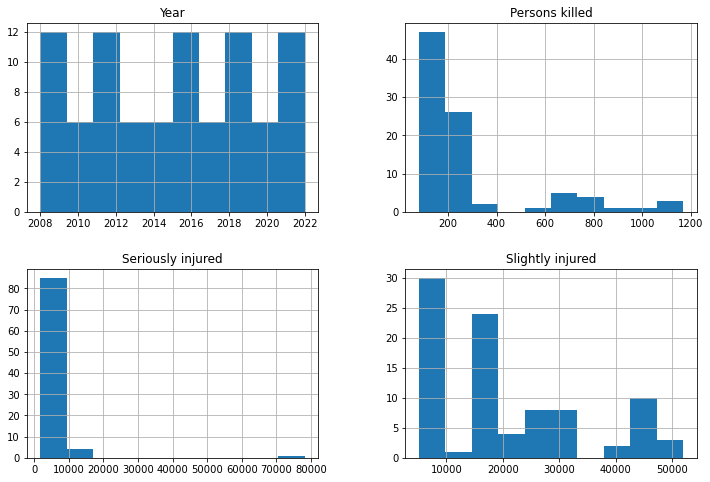

In [85]:
#This code snippet allows us to quickly visualize the distribution of each numerical variable in our dataset. So, below are the histogram that gives an overall insight about all numerical columns in our datasets and eventually we can see there are 4 numerical coulumns.

# Histograms
df.hist(figsize=(12, 8))
plt.show()


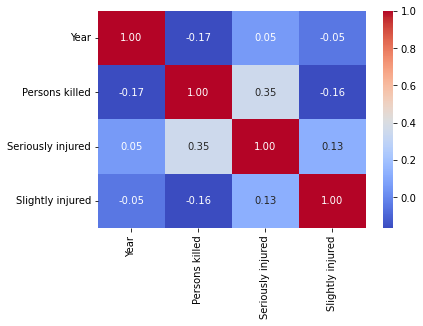

In [88]:
#This code snippet allows us to quickly visualize the correlation between pairs of numerical variables in our dataset.
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


During crossing the road, the most death cases occurred in the inner town in the year: 2008
Number of death cases: 181
------------------------------------------------------------------------------------------------------
To get and overview of most death cases shorter time in mentione condition, we may visualise is such


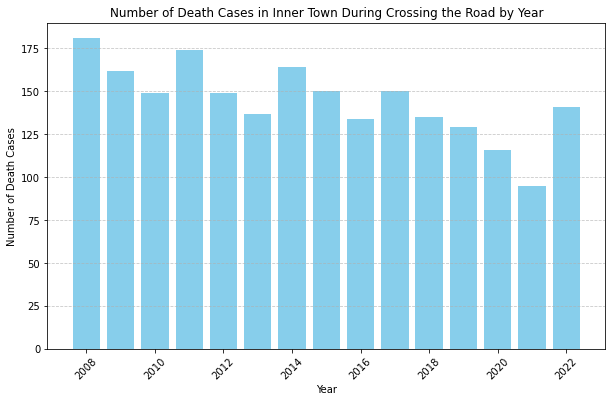

In [100]:
#Research question -1: During the crossing road, which year mostly death cases occurred in inner town?

inner_town_crossing = df[(df['Kind of accident'] == 'Crossing accident') & (df['Area type'] == 'inner town')]

# Group by year and sum the number of deaths
death_by_year = inner_town_crossing.groupby('Year')['Persons killed'].sum()

# Find the year with the maximum number of deaths
most_death_year = death_by_year.idxmax()
max_death_count = death_by_year.max()

print("During crossing the road, the most death cases occurred in the inner town in the year:", most_death_year)
print("Number of death cases:", max_death_count)


print ("------------------------------------------------------------------------------------------------------")

#Visialization of research question:

print ("To get and overview of most death cases shorter time in mentione condition, we may visualise is such")

# Group by year and sum the number of deaths
death_by_year = inner_town_crossing.groupby('Year')['Persons killed'].sum().reset_index()

# Plot the number of death cases by year
plt.figure(figsize=(10, 6))
plt.bar(death_by_year['Year'], death_by_year['Persons killed'], color='skyblue')
plt.title('Number of Death Cases in Inner Town During Crossing the Road by Year')
plt.xlabel('Year')
plt.ylabel('Number of Death Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


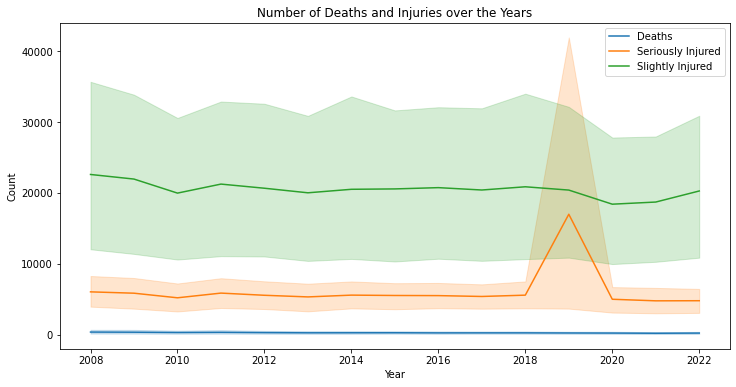

In [92]:
# Plot the number of deaths and injuries over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Persons killed', data=df, label='Deaths')
sns.lineplot(x='Year', y='Seriously injured', data=df, label='Seriously Injured')
sns.lineplot(x='Year', y='Slightly injured', data=df, label='Slightly Injured')
plt.title('Number of Deaths and Injuries over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

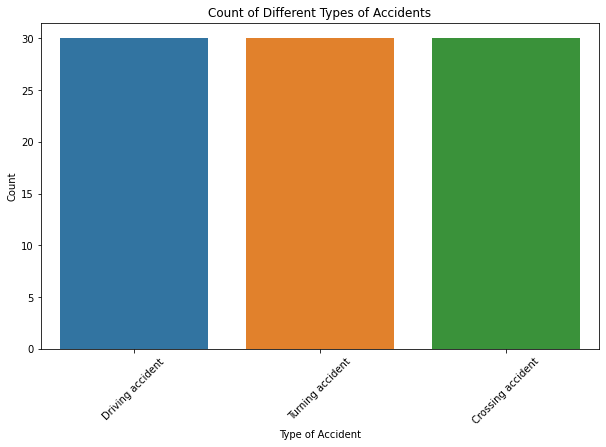

In [90]:
# Research Question 2: What are the most common types of accidents?

# Count plot for type of accident
plt.figure(figsize=(10, 6))
sns.countplot(x='Kind of accident', data=df)
plt.title('Count of Different Types of Accidents')
plt.xlabel('Type of Accident')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [91]:
# Research Question 3: Which cities have the highest number of accidents?

# Count plot for city of accident
plt.figure(figsize=(12, 6))
sns.countplot(x='Areas', data=df, order=df['Areas'].value_counts().index)
plt.title('Count of Accidents by City')
plt.xlabel('City of Accident')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

KeyError: 'Areas'

<Figure size 864x432 with 0 Axes>

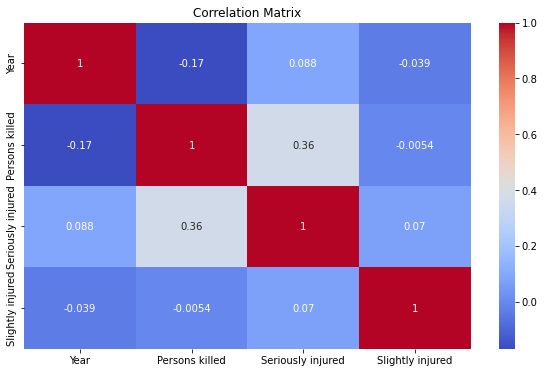

In [73]:
# Research Question 4: Is there any correlation between the severity of accidents and the number of deaths or injuries?

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

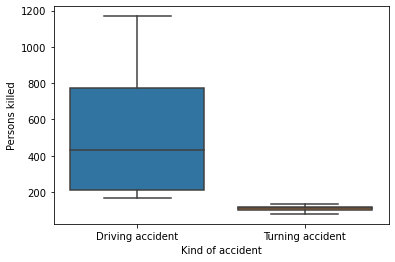

In [60]:
# Explore relationship between kind of accident and injury severity (if injury columns are numerical)
sns.boxplot(x='Kind of accident', y='Persons killed', data=df)  # Repeat for other injury columns
plt.show()

In [76]:
# Explore city-wise distribution of accidents (may need further cleaning of city names)
df['Areas'].value_counts().plot(kind='bar')
plt.show()

KeyError: 'Areas'

In [77]:
# Assuming 'kind of accident' is a categorical column (e.g., 'collision', 'fall', etc.)
correlation = df.groupby('Kind of accident')['Seriously injured'].mean()
print(correlation)

Kind of accident
Driving accident    10009.500000
Turning accident     3347.433333
Name: Seriously injured, dtype: float64
